In [1]:
%pylab notebook
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import *
import numpy as np
from math import *
import time
import pandas as pd
from datetime import datetime
import csv
from scipy import integrate
import itertools


Populating the interactive namespace from numpy and matplotlib


In [4]:

orbit_length = 93 #Length of orbit in minutes approx
chunksize = orbit_length

dim = (orbit_length, 1)

port_orbit_power = np.zeros(dim)
port_dep_orbit_power = np.zeros(dim)
star_orbit_power = np.zeros(dim)
star_dep_orbit_power = np.zeros(dim)
zenith_orbit_power = np.zeros(dim)

port_energy = []
port_dep_energy = []
star_energy = []
star_dep_energy = []
zenith_energy = []

total_energy = []




tstart = time.time()

i = 0

for chunk in pd.read_csv("V2_EX2-Port-Power.csv", chunksize=chunksize):
    port_orbit_power=(chunk.iloc[:,1])
    try:
        port_energy.append(integrate.cumtrapz(port_orbit_power,np.linspace(0,orbit_length-1,orbit_length), initial=0)[-1])
    except:
        pass
    i = i + 1

i = 0

for chunk in pd.read_csv("V2_EX2-PortDep-Power.csv", chunksize=chunksize):
    port_dep_orbit_power=(chunk.iloc[:,1])
    try:
        port_dep_energy.append(integrate.cumtrapz(port_dep_orbit_power,np.linspace(0,orbit_length-1,orbit_length), initial=0)[-1])
    except:
        pass
    i = i + 1

i = 0

for chunk in pd.read_csv("V2_EX2-Star-Power.csv", chunksize=chunksize):
    star_orbit_power=(chunk.iloc[:,1])
    try:
        star_energy.append(integrate.cumtrapz(star_orbit_power,np.linspace(0,orbit_length-1,orbit_length), initial=0)[-1])
    except:
        pass
    i = i + 1

i = 0

for chunk in pd.read_csv("V2_EX2-StarDep-Power.csv", chunksize=chunksize):
    star_dep_orbit_power=(chunk.iloc[:,1])
    try:
        star_dep_energy.append(integrate.cumtrapz(star_dep_orbit_power,np.linspace(0,orbit_length-1,orbit_length), initial=0)[-1])
    except:
        pass
    i = i + 1

i = 0

for chunk in pd.read_csv("V2_EX2-Zenith-Power.csv", chunksize=chunksize):
    zenith_orbit_power=(chunk.iloc[:,1])
    try:
        zenith_energy.append(integrate.cumtrapz(zenith_orbit_power,np.linspace(0,orbit_length-1,orbit_length), initial=0)[-1])
    except:
        pass
    i = i + 1
    
total_energy= np.array(port_energy)/60+np.array(port_dep_energy)/60+np.array(star_energy)/60+np.array(star_dep_energy)/60+np.array(zenith_energy)/60
#total_energy= np.array(port_energy)/60+np.array(star_energy)/60+np.array(zenith_energy)/60 #use if no deployables


print(time.time()-tstart)


288.4342608451843


In [5]:
pmin = total_energy[0:5000].min()
pmean = total_energy[0:5000].mean()
pmax = total_energy[0:5000].max()
pmin_idx = numpy.where(total_energy[0:5000] == total_energy[0:5000].min())[0]
pmean_idx = numpy.where(total_energy[0:5000] == total_energy[0:5000].mean())[0]
pmax_idx = numpy.where(total_energy[0:5000] == total_energy[0:500].max())[0]
#pmean_orbit = (port_orbit_power[:,99].mean()+port_dep_orbit_power[:,99].mean()+star_orbit_power[:,99].mean()+star_dep_orbit_power[:,99].mean()+zenith_orbit_power[:,99].mean())
print("Min, idx: " + str(pmin) + ", " + str(pmin_idx))
print("Mean, idx: " + str(pmean) + ", " + str(pmean_idx))
print("Max, idx: " + str(pmax) + ", " + str(pmax_idx))
#print("Mean Power: " + str(pmean_orbit))

Min, idx: 7.914183333333333, [12]
Mean, idx: 9.413878743333335, []
Max, idx: 11.326891666666665, [426]


KeyError: "None of [Int64Index([12], dtype='int64')] are in the [index]"

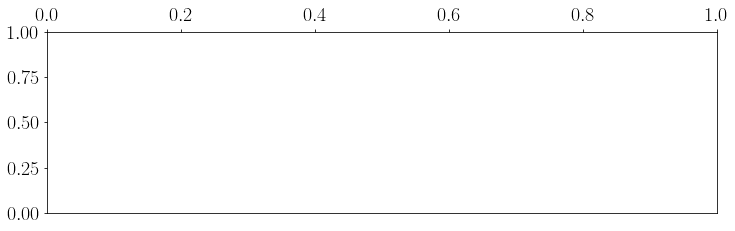

In [4]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure(figsize=(12, 10), frameon=True)
plt.subplots_adjust(hspace=0.0)
fig.set_facecolor('w')

ax1 = plt.subplot(3,1,1)
ax1.xaxis.tick_top()
ax1.plot(np.linspace(0,orbit_length,len(port_orbit_power)), port_orbit_power[pmin_idx],linewidth = 3,label='Port')
ax1.plot(np.linspace(0,orbit_length,len(port_dep_orbit_power)), port_dep_orbit_power[pmin_idx],linewidth = 3,label='Port Deployable')
ax1.plot(np.linspace(0,orbit_length,len(star_orbit_power)),star_orbit_power[pmin_idx],linewidth = 3,label='Starboard')
ax1.plot(np.linspace(0,orbit_length,len(star_dep_orbit_power)),star_dep_orbit_power[pmin_idx],linewidth = 3,label='Starboard Deployable')
ax1.plot(np.linspace(0,orbit_length,len(zenith_orbit_power)),zenith_orbit_power[pmin_idx],linewidth = 3,label='Zenith')
ax1.legend(loc=0, fontsize = 20, ncol = 3)
ax1.set_ylim([-0.5, 9])

ax2 = plt.subplot(3,1,2)
ax2.plot(np.linspace(0,orbit_length,len(port_orbit_power)), port_orbit_power[pmax_idx],linewidth = 3,label='Port')
ax2.plot(np.linspace(0,orbit_length,len(port_dep_orbit_power)), port_dep_orbit_power[pmax_idx],linewidth = 3,label='Port Deployable')
ax2.plot(np.linspace(0,orbit_length,len(star_orbit_power)),star_orbit_power[pmax_idx],linewidth = 3,label='Starboard')
ax2.plot(np.linspace(0,orbit_length,len(star_dep_orbit_power)),star_dep_orbit_power[pmax_idx],linewidth = 3,label='Starboard Deployable')
ax2.plot(np.linspace(0,orbit_length,len(zenith_orbit_power)),zenith_orbit_power[pmax_idx],linewidth = 3,label='Zenith')
#ax2.legend(loc=0, fontsize = 20, ncol = 3)
ax2.set_ylim([-0.5,7])

ax3 = plt.subplot(3,1,3)
ax3.plot(np.linspace(0,orbit_length,len(port_orbit_power)), port_orbit_power[218],linewidth = 3,label='Port')
ax3.plot(np.linspace(0,orbit_length,len(port_dep_orbit_power)), port_dep_orbit_power[218],linewidth = 3,label='Port Deployable')
ax3.plot(np.linspace(0,orbit_length,len(star_orbit_power)),star_orbit_power[218],linewidth = 3,label='Starboard')
ax3.plot(np.linspace(0,orbit_length,len(star_dep_orbit_power)),star_dep_orbit_power[218],linewidth = 3,label='Starboard Deployable')
ax3.plot(np.linspace(0,orbit_length,len(zenith_orbit_power)),zenith_orbit_power[218],linewidth = 3,label='Zenith')
#ax2.legend(loc=0, fontsize = 20, ncol = 3)
ax2.set_ylim([-0.5,7])

ax3.set_xlabel('Time (Day)', fontsize = 25)
ax1.set_ylabel(r"Power$_\mathrm{min}$ (W)", fontsize = 25)
ax2.set_ylabel(r"Power$_\mathrm{max}$ (W)", fontsize = 25)
ax3.set_ylabel(r"Power$_\mathrm{mean}$ (W)", fontsize = 25)
ax1.set_title('Power generated over worst and best case orbits', fontsize = 30, pad=20)


Text(0.5, 1.0, 'Energy Generated Per Orbit of ExAlta 2')

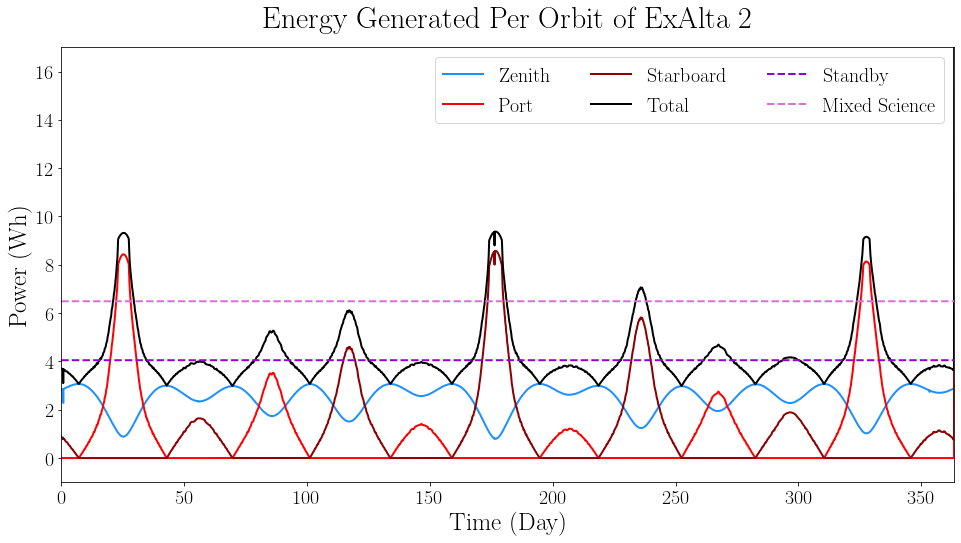

In [23]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

total_energy= np.array(port_energy)/60+np.array(star_energy)/60+np.array(star_dep_energy)/60

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure(figsize=(16, 8), frameon=True)
plt.subplots_adjust(hspace=0.0)
fig.set_facecolor('w')

ax1 = plt.subplot(1,1,1)
ax1.plot

ax1.plot(np.linspace(0,len(zenith_energy)*0.064305,len(zenith_energy)),np.array(port_energy)/60,linewidth = 2, color ='dodgerblue',label='Zenith')
#ax1.plot(np.linspace(0,len(zenith_energy)*0.064305,len(zenith_energy)),np.array(port_dep_energy)/60,linewidth = 2,color ='blue',label='Port Deployable')
ax1.plot(np.linspace(0,len(zenith_energy)*0.064305,len(zenith_energy)),np.array(star_energy)/60,linewidth = 2,color ='red',label='Port')
ax1.plot(np.linspace(0,len(zenith_energy)*0.064305,len(zenith_energy)),np.array(star_dep_energy)/60,linewidth = 2,color ='darkred',label='Starboard')
#ax1.plot(np.linspace(0,len(zenith_energy)*0.064305,len(zenith_energy)),np.array(zenith_energy)/60,linewidth = 2,color ='darkviolet',label='Starboard Deployable')
#ax1.plot(np.linspace(0,len(zenith_energy)*0.064305,len(zenith_energy)),pmax*np.ones(len(zenith_energy)),'darkgreen', linestyle ='--',linewidth = 2,label='Max')
#ax1.plot(np.linspace(0,len(zenith_energy)*0.064305,len(zenith_energy)),pmin*np.ones(len(zenith_energy)),'chartreuse', linestyle ='--',linewidth = 2,label='Min')
#ax1.plot(np.linspace(0,len(zenith_energy)*0.064305,len(zenith_energy)),pmean*np.ones(len(zenith_energy)),'limegreen', linestyle ='--',linewidth = 2,label='Mean')
ax1.plot(np.linspace(0,len(zenith_energy)*0.064305,len(total_energy)),total_energy,linewidth = 2,color = 'k',label='Total')

ax1.plot(np.linspace(0,len(zenith_energy)*0.064305,len(zenith_energy)),4.05*np.ones(len(zenith_energy)),'darkviolet', linestyle ='--',linewidth = 2,label='Standby')
ax1.plot(np.linspace(0,len(zenith_energy)*0.064305,len(zenith_energy)),6.49*np.ones(len(zenith_energy)),'orchid', linestyle ='--',linewidth = 2,label='Mixed Science')
ax1.legend(loc=0, fontsize = 20, ncol = 3)
ax1.set_xlim([0,len(zenith_energy)*0.064305*0.5])
ax1.set_ylim([-1, 17])

ax1.set_xlabel('Time (Day)', fontsize = 25)
ax1.set_ylabel('Power (Wh)', fontsize = 25)
ax1.set_title('Energy Generated Per Orbit of ExAlta 2', fontsize = 30, pad=20)



In [18]:
orbit_length = 93 #Length of orbit in minutes approx
chunksize = orbit_length

dim = (orbit_length, 1)

port_orbit_sunlit = np.zeros(dim)

port_sunlit = []

total_energy = []


tstart = time.time()


for chunk in pd.read_csv("2U_NoDep-Port-Power.csv", chunksize=chunksize):
    port_orbit_sunlit=(chunk.iloc[:,2])
    try:
        port_sunlit.append(sum(port_orbit_sunlit)/orbit_length)
    except:
        pass




In [19]:
smin = np.array(port_sunlit)[0:5000].min()
smean = np.array(port_sunlit)[0:5000].mean()
smax = np.array(port_sunlit)[0:5000].max()
smin_idx = numpy.where(np.array(port_sunlit)[0:5000] == np.array(port_sunlit)[0:5000].min())[0]
smean_idx = numpy.where(np.array(port_sunlit)[0:5000] == np.array(port_sunlit)[0:5000].mean())[0]
smax_idx = numpy.where(np.array(port_sunlit)[0:5000] == np.array(port_sunlit)[0:5000].max())[0]

print("Min, idx: " + str(smin) + ", " + str(smin_idx))
print("Mean, idx: " + str(smean) + ", " + str(smean_idx))
print("Max, idx: " + str(smax) + ", " + str(smax_idx))

Min, idx: 0.5830649999999999, [931]
Mean, idx: 0.6630463418064517, []
Max, idx: 1.0, [1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150
 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164
 1165 1166 1167 1168 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056
 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070
 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 2083 2084
 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2097 2098
 2099 2100 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111 2112
 2113 2114 2115 4401 4402 4403 4404 4405 4406 4407 4408 4409 4410 4411
 4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 44

NameError: name 'port_sunlit' is not defined

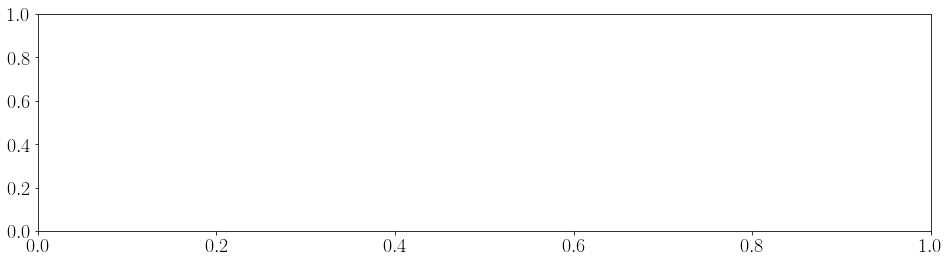

In [7]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure(figsize=(16, 4), frameon=True)
plt.subplots_adjust(hspace=0.0)
fig.set_facecolor('w')

ax1 = plt.subplot(1,1,1)
ax1.plot(np.linspace(0,len(port_sunlit)*0.06458,len(port_sunlit)),  np.array(port_sunlit),linewidth = 3, color ='dodgerblue',label='Port')
ax1.set_xlim([0,364])
#ax1.set_ylim([0.6, 0.65])

ax1.set_xlabel('Time (Day)', fontsize = 25)
ax1.set_ylabel('Fraction of Orbital \n Time in Sunlight', fontsize = 25)
ax1.set_title('Orbits by sunlight exposure', fontsize = 30, pad=20)

In [12]:
wtr = csv.writer(open ('mean_power_port.csv', 'w'), delimiter=';', lineterminator='\n')
for x in port_orbit_power[:,218] : 
        wtr.writerow ([x])

wtr = csv.writer(open ('mean_powers_port_dep.csv', 'w'), delimiter=';', lineterminator='\n')
for x in port_dep_orbit_power[:,218] : 
        wtr.writerow ([x])
        
wtr = csv.writer(open ('mean_powers_star.csv', 'w'), delimiter=';', lineterminator='\n')
for x in star_orbit_power[:,218] : 
        wtr.writerow ([x])

wtr = csv.writer(open ('mean_powers_star_dep.csv', 'w'), delimiter=';', lineterminator='\n')
for x in star_dep_orbit_power[:,218] : 
        wtr.writerow ([x])
        
f = open('mean_powers_zen.csv', 'w')
wtr = csv.writer(f, delimiter=';', lineterminator='\n')
for x in zenith_orbit_power[:,218] : 
        wtr.writerow ([x])
f.close()


In [4]:
data = pd.read_csv("ExAlta2_Eclipse_Summary_20200619-1328.csv") 

eclipse_times = np.array(data.iloc[2:,5])
penumbra_pre = []
penumbra_post = []
umbra = []
umbra_ex1 = []
umbra_new = []
#for i in range(len(eclipse_times)):
#    if i%3==0:
#        penumbra_pre.append(eclipse_times[i])
#    elif i%3==1:
#        umbra.append(eclipse_times[i])
#    elif i%3==2:
#        penumbra_post.append(eclipse_times[i])

for i in range(len(eclipse_times)):
    #if eclipse_times[i] >2000 and eclipse_times[i]<2300:
        umbra_ex1.append(eclipse_times[i])
        
data = pd.read_csv("ISS_25544_Eclipse_Summary-20200619-1329.csv") 

eclipse_times = np.array(data.iloc[2:,5])

for i in range(len(eclipse_times)):
    #if eclipse_times[i] >2000 and eclipse_times[i]<2300:
        umbra_new.append(eclipse_times[i])
        
data = pd.read_csv("EXALTA-1-Eclipse-Times.csv") 

eclipse_times = np.array(data.iloc[2:,14])

for i in range(len(eclipse_times)):
    #if eclipse_times[i] >2000 and eclipse_times[i]<2300:
        umbra.append(eclipse_times[i])

Text(0.5, 1.0, 'Orbits by sunlight exposure')

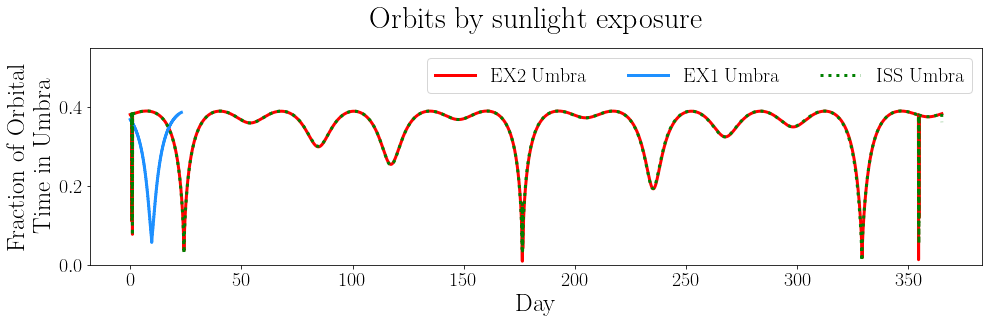

In [14]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure(figsize=(16, 4), frameon=True)
plt.subplots_adjust(hspace=0.0)
fig.set_facecolor('w')

ax1 = plt.subplot(1,1,1)
ax1.plot(np.linspace(0,365,len(umbra_ex1)),  np.array(umbra_ex1)*.00018,linewidth = 3, color ='red',label='EX2 Umbra')
ax1.plot(np.linspace(0,23,len(umbra)),  np.array(umbra)*.00018,linewidth = 3, color ='dodgerblue',label='EX1 Umbra')
ax1.plot(np.linspace(0,365,len(umbra_new)),  np.array(umbra_new)*.00018,linewidth = 3, linestyle =':', color ='green',label='ISS Umbra')
#ax1.set_xlim([0,364])
ax1.set_ylim([0, 0.55])

ax1.legend(loc=1, fontsize = 20, ncol = 3)
ax1.set_xlabel('Day', fontsize = 25)
ax1.set_ylabel('Fraction of Orbital \n Time in Umbra', fontsize = 25)
ax1.set_title('Orbits by sunlight exposure', fontsize = 30, pad=20)

In [8]:
dur1 = []
dur2 = []
dur3 = []
dur4 = []
dur5 = []
dur6 = []

data = pd.read_csv("RAAN_Iteration/ExAlta2bad_Eclipse_Summary_0deg.csv") 

eclipse_times = np.array(data.iloc[2:,5])

for i in range(len(eclipse_times)):
    dur1.append(eclipse_times[i])
        
data = pd.read_csv("RAAN_Iteration/ExAlta2bad_Eclipse_Summary_22deg.csv") 

eclipse_times = np.array(data.iloc[2:,5])

for i in range(len(eclipse_times)):
    dur2.append(eclipse_times[i])
        
data = pd.read_csv("RAAN_Iteration/ExAlta2bad_Eclipse_Summary_45deg.csv") 

eclipse_times = np.array(data.iloc[2:,5])

for i in range(len(eclipse_times)):
    dur3.append(eclipse_times[i])
    
data = pd.read_csv("RAAN_Iteration/ExAlta2bad_Eclipse_Summary_90deg.csv") 

eclipse_times = np.array(data.iloc[2:,5])

for i in range(len(eclipse_times)):
    dur4.append(eclipse_times[i])
    
data = pd.read_csv("RAAN_Iteration/ExAlta2bad_Eclipse_Summary_135deg.csv") 

eclipse_times = np.array(data.iloc[2:,5])

for i in range(len(eclipse_times)):
    dur5.append(eclipse_times[i])
    
data = pd.read_csv("RAAN_Iteration/ExAlta2bad_Eclipse_Summary_180deg.csv") 

eclipse_times = np.array(data.iloc[2:,5])

for i in range(len(eclipse_times)):
    dur6.append(eclipse_times[i])

Text(0.5, 1.0, 'Orbits by sunlight exposure')

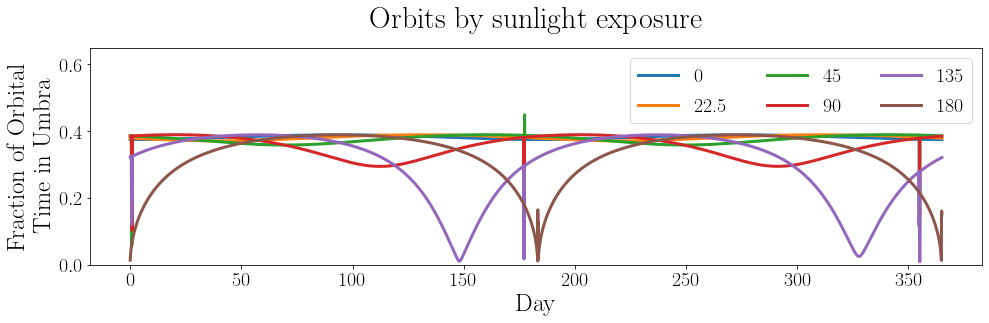

In [12]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure(figsize=(16, 4), frameon=True)
plt.subplots_adjust(hspace=0.0)
fig.set_facecolor('w')

ax1 = plt.subplot(1,1,1)
ax1.plot(np.linspace(0,365,len(dur1)),  np.array(dur1)*.00018,linewidth = 3,label='0')
ax1.plot(np.linspace(0,365,len(dur2)),  np.array(dur2)*.00018,linewidth = 3,label='22.5')
ax1.plot(np.linspace(0,365,len(dur3)),  np.array(dur3)*.00018,linewidth = 3,label='45')
ax1.plot(np.linspace(0,365,len(dur4)),  np.array(dur4)*.00018,linewidth = 3,label='90')
ax1.plot(np.linspace(0,365,len(dur5)),  np.array(dur5)*.00018,linewidth = 3,label='135')
ax1.plot(np.linspace(0,365,len(dur6)),  np.array(dur6)*.00018,linewidth = 3,label='180')
#ax1.set_xlim([0,364])
ax1.set_ylim([0, 0.65])

ax1.legend(loc=1, fontsize = 20, ncol = 3)
ax1.set_xlabel('Day', fontsize = 25)
ax1.set_ylabel('Fraction of Orbital \n Time in Umbra', fontsize = 25)
ax1.set_title('Orbits by sunlight exposure', fontsize = 30, pad=20)

In [39]:
min(port_sunlit[0:500])

0.6129032258064516